In [75]:
import pandas as pd
import numpy as np

In [76]:
file='Index2018.csv'
data=pd.read_csv(file)
print(data.dtypes,'\nShape->',data.shape)
data.head()

date       object
spx       float64
dax       float64
ftse      float64
nikkei    float64
dtype: object 
Shape-> (6269, 5)


,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


### Preprocessing

In [77]:
data.isna().sum()
#No observed missings ,

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

In [78]:
# changing date type to dtime64.
data['date']=pd.to_datetime(data['date'])

C:\Users\mmopa\AppData\Local\Temp\ipykernel_572\2495886075.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['date']=pd.to_datetime(data['date'])


In [79]:
# Setting date column as an index
data.set_index('date',inplace=True)
data.head()

,spx,dax,ftse,nikkei
date,,,,
1994-07-01,469.90,2224.95,3445.98,18124.01
1994-10-01,475.27,2225.00,3440.58,18443.44
1994-11-01,474.13,2228.10,3413.77,18485.25
1994-12-01,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [80]:
# Switching the frequency to work_days
data=data.asfreq(freq='b')

In [81]:
data.isna().sum()
#955 missings from each column

spx       920
dax       920
ftse      920
nikkei    920
dtype: int64

In [82]:
#Filling using backfilling method
data.fillna(method='ffill',inplace=True)
data.isna().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

In [83]:
# taking records , starting from 2010
start_date=2010
mask=data.index.year>=start_date
data=data[mask]

In [84]:
data.isna().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

In [85]:
data.head()

,spx,dax,ftse,nikkei
date,,,,
2010-01-01,1115.102681,5957.43,5412.88,10546.44
2010-01-04,1178.102625,6235.56,5744.89,11244.40
2010-01-05,1178.102625,6235.56,5744.89,11244.40
2010-01-06,1070.707343,5981.27,5163.30,9711.83
2010-01-07,1027.373870,5857.43,4805.75,9191.60


In [88]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

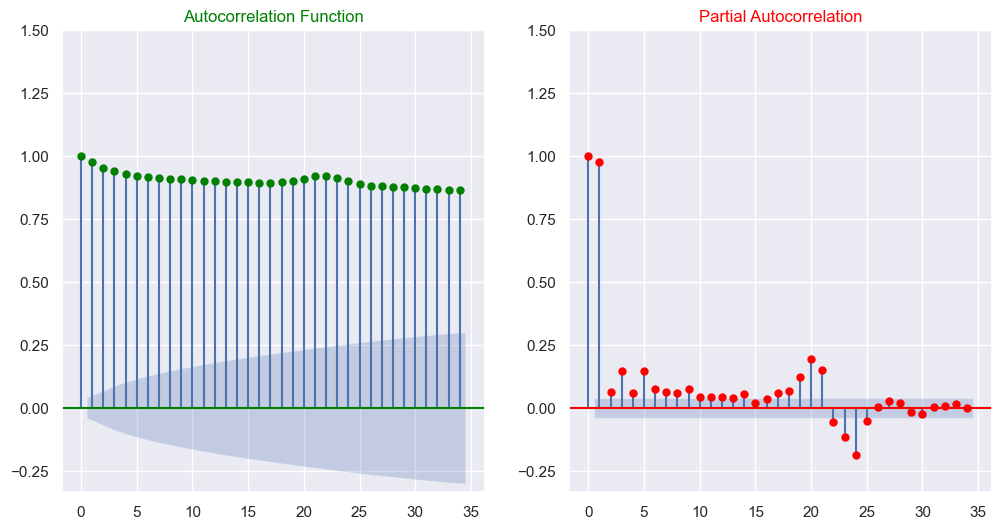

In [107]:
fig,ax=plt.subplots(1,2,figsize=(12,6))
plot_acf(data['ftse'],ax=ax[0],color='green')
plot_pacf(data['ftse'],ax=ax[1],color='red')
ax[0].set_ylim(-1/3,3/2)
ax[0].set_title('Autocorrelation Function',color='green')
ax[1].set_ylim(-1/3,3/2)
ax[1].set_title('Partial Autocorrelation',color='red')
plt.show()